In [1]:
# Import the required libraries: Pandas, Numpy, Matplotlib and   Seaborn

import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
# Let us load and read the data from the csv file 

df=pd.read_csv("StudentsPerformance.csv")
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [4]:
df["Total_Scores"]=df["math score"]+df["math score"]+df["math score"]
df.sample(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Scores
827,female,group C,some high school,standard,none,65,69,76,195
939,male,group D,some high school,standard,completed,77,68,69,231
343,male,group D,associate's degree,standard,completed,67,72,67,201


In [6]:
df["Percentage"]=df["Total_Scores"]*1/3
df.sample(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Scores,Percentage
820,female,group A,some high school,standard,completed,85,90,92,255,85.0
941,female,group D,master's degree,standard,none,78,91,96,234,78.0


### Quantitative Bivariate Data

Bivariate data arise when every "unit of analysis" in a dataset is assed with respect to two traits:

Scatter PLots are largely and commonly used, easily_ understood visualization of quantitative bivariate data

Make Scatter Plots:
PLot  on the vertical axis and th horizontal axis:
Check for positive dependence relationship between the two measures.

In a scatterplot with more than around 100 points, "overplotting" becomes an issue.Many points fall on top of each other in the plot

This obscures  relationships in the middle of  the distribution and overemphasizes the extremes.

We can mitigate overplotting by using an "alpha' channel to make  the points semi_transparent

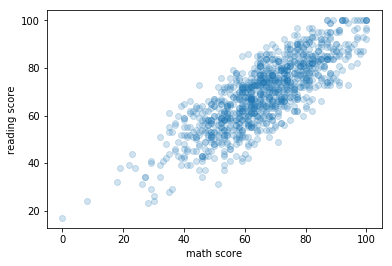

In [12]:
sns.regplot(x="math score", y="reading score", data=df, fit_reg=False, scatter_kws={"alpha": 0.2})

To avoid overplotting

Make a plot of the density of points

In the plots below, darker colors indicate where  greater number of points fall.

The two plot margins show the densities for the Maths score and Writing Score separately, while the plot in the center shows their density jointly.

This plot also shows the Pearson correlation coefficient between the writing scores and the maths score, which is 0.62. 

The Pearson correlation coefficient ranges from -1 to 1, with values approaching 1 indicating a more perfect positive dependence.

In many settings, a correlation of 0.62 would be considered a moderately strong positive dependence. 

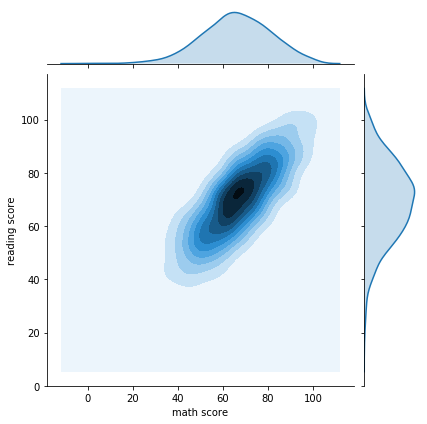

In [13]:
sns.jointplot(x="math score", y="reading score", kind='kde', data=df)

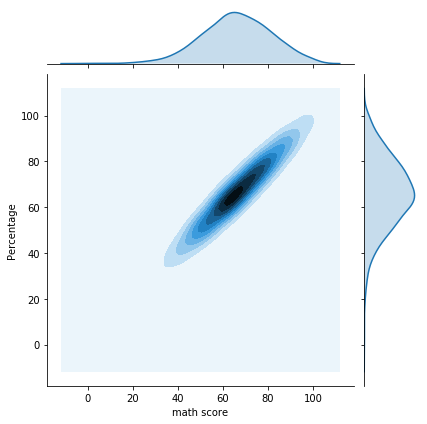

In [15]:
sns.jointplot(x="math score", y="Percentage", kind='kde', data=df)

### Heterogeneity and Stratification

Most human characteristics are complex -- they vary by gender, age, ethnicity, and other factors.  This type of variation is often referred to as "heterogeneity".  When such heterogeneity is present, it is usually productive to explore the data more deeply by stratifying on relevant factors, as we did in the univariate analyses.  

Below, we continue to probe the relationship between math scores and writing  score, stratifying first by gender, then by gender and ethnicity. The gender-stratified plot indicates that female tend to perform better in mathematics somewhat than men  -- this is reflected in the fact that the cloud of points on the left is shifted slightly up and to the right relative to the cloud of points on the right.  In addition, the correlation between maths score and writing score appears to be somewhat weaker in women than in men.

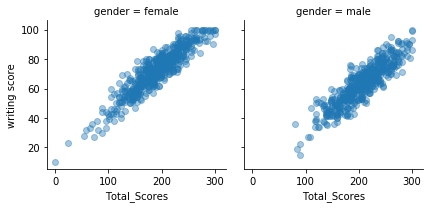

In [17]:
df["gender"] = df["gender"].replace({1: "Female", 2: "Male"}) 
sns.FacetGrid(df, col="gender").map(plt.scatter, "Total_Scores", "writing score", alpha=0.4).add_legend()

Consistent with the scatterplot, a slightly weaker correlation between total scores and writing score in women (compared to men) can be seen by calculating the correlation coefficient separately within each gender.  

The '`corr`' method of a dataframe calculates the correlation coefficients for every pair of variables in the dataframe.  This method returns a "correlation matrix", which is a table containing the correlations between every pair of variables in the data set.  Note that the diagonal of a correlation matrix always contains 1's, since a variable always has correlation 1 with itself.  The correlation matrix is also symmetric around this diagonal, since the correlation between two variables '`X`' and '`Y`' does not depend on the order in which we consider the two variables.  

In the results below, we see that the correlation between total scores and writing scores in men is 0.89, while in female the correlation is .92.

In [18]:
print(df.loc[df["gender"]=="female", ["Total_Scores", "writing score"]].dropna().corr())
print(df.loc[df["gender"]=="male", ["Total_Scores", "writing score"]].dropna().corr())

               Total_Scores  writing score
Total_Scores       1.000000       0.920729
writing score      0.920729       1.000000
               Total_Scores  writing score
Total_Scores       1.000000       0.891973
writing score      0.891973       1.000000


Next we look to stratifying the data by both gender and ethnicity.  This results in 2 x 5 = 10 total strata, since there are 2 gender strata and 5 ethnicity strata. These scatterplots reveal differences in the means as well a diffrences in the degree of association (correlation) between different pairs of variables.  We see that although some ethnic groups tend to have longer/shorter arms and legs than others, the relationship between arm length and leg length within genders is roughly similar across the ethnic groups.  

One notable observation is that ethnic group 5, which consists of people who report being multi-racial or are of any race not treated as a separate group (due to small sample size), the correlation between arm length and leg length is stronger, especially for men.  This is not surprising, as greater heterogeneity can allow correlations to emerge that are indiscernible in more homogeneous data.   

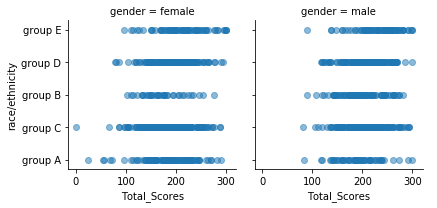

In [23]:
_ = sns.FacetGrid(df, col="gender").map(plt.scatter, "Total_Scores", "race/ethnicity", alpha=0.5).add_legend()

### Categorical Bivariate Data

Working with bivariate data that are categorical:

Starting with a contingency table that counts the number of people having each combination of two factors:

To illustrate lets consider gender and test preparation course columns

First, we will create ne wversions of these two variables using text lables instead of numbers to represent the categories.

We also create a new data set that omits students who are  male and did not complete the test preparation score



In [24]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Scores,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.0
1,female,group C,some college,standard,completed,69,90,88,207,69.0


In [43]:

df["dgender"] = df["gender"].replace({"gender": "sex"})
df["test_prepx"] = df["test preparation course"].replace({"none": "None", "completed": "Completed"})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Scores,Percentage,dgender,test_prepx
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.0,female,None
1,female,group C,some college,standard,completed,69,90,88,207,69.0,female,Completed
2,female,group B,master's degree,standard,none,90,95,93,270,90.0,female,None
3,male,group A,associate's degree,free/reduced,none,47,57,44,141,47.0,male,None
4,male,group C,some college,standard,none,76,78,75,228,76.0,male,None


In [40]:
# Omit the male students who did not complete the test preparation course

db = df.loc[(df["test preparation course"]!= "none") & (df["gender"] != "male"), :]
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Scores,Percentage
1,female,group C,some college,standard,completed,69,90,88,207,69.0
6,female,group B,some college,standard,completed,88,95,92,264,88.0
21,female,group B,some college,free/reduced,completed,65,75,70,195,65.0
38,female,group D,associate's degree,free/reduced,completed,75,90,88,225,75.0
46,female,group A,associate's degree,standard,completed,55,65,62,165,55.0


In [53]:
# Total count of  gender, male and female combined

df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

Now we can create a contingency table, counting the number of people in each cell defined by a combination of education and marital status.

In [64]:
# Create the contigency table that counts the number of male and female who completed the test preparation course in  each cell defined


a= pd.crosstab(df["gender"], df["test preparation course"])
a

test preparation course,completed,none
gender,,
female,184,334
male,174,308


In [65]:
# Normalizing the  results of the total scores against gender contigency table

a.apply(lambda z: z/z.sum(), axis=1)

test preparation course,completed,none
gender,,
female,0.355212,0.644788
male,0.360996,0.639004


In [60]:
# Contigency table that counts the race? ethnicity against total marks scored

f= pd.crosstab(df["race/ethnicity"], df["Total_Scores"])
f

Total_Scores,0,24,54,57,66,69,72,78,81,84,...,273,276,279,282,285,288,291,294,297,300
race/ethnicity,,,,,,,,,,,,,,,,,,,,,
group A,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
group B,0,1,1,1,0,1,1,0,0,0,...,2,0,0,2,0,0,1,0,0,0
group C,1,0,0,0,1,0,0,0,1,0,...,5,2,1,1,0,3,1,2,0,0
group D,0,0,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,1,1,0,1
group E,0,0,0,0,0,0,0,0,0,0,...,1,2,2,4,1,0,2,0,3,5


In [63]:
# Normalizing the  results of the total scores against gender contigency table

f.apply(lambda z: z/z.sum(), axis=1)

Total_Scores,0,24,54,57,66,69,72,78,81,84,...,273,276,279,282,285,288,291,294,297,300
race/ethnicity,,,,,,,,,,,,,,,,,,,,,
group A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236,...,0.011236,0.011236,0.000000,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000,0.011236
group B,0.000000,0.005263,0.005263,0.005263,0.000000,0.005263,0.005263,0.000000,0.000000,0.000000,...,0.010526,0.000000,0.000000,0.010526,0.000000,0.000000,0.005263,0.000000,0.000000,0.000000
group C,0.003135,0.000000,0.000000,0.000000,0.003135,0.000000,0.000000,0.000000,0.003135,0.000000,...,0.015674,0.006270,0.003135,0.003135,0.000000,0.009404,0.003135,0.006270,0.000000,0.000000
group D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.003817,0.000000,...,0.000000,0.003817,0.003817,0.000000,0.003817,0.000000,0.003817,0.003817,0.000000,0.003817
group E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007143,0.014286,0.014286,0.028571,0.007143,0.000000,0.014286,0.000000,0.021429,0.035714


We can also normalize within the columns instead of normalizing within the rows. This gives us the proportion of people with each marital status group who have each level of educational attainment.

In [66]:
f.apply(lambda z: z/z.sum(), axis=0)

Total_Scores,0,24,54,57,66,69,72,78,81,84,...,273,276,279,282,285,288,291,294,297,300
race/ethnicity,,,,,,,,,,,,,,,,,,,,,
group A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.111111,0.166667,0.00,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.142857
group B,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.222222,0.000000,0.00,0.285714,0.0,0.0,0.166667,0.000000,0.0,0.000000
group C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,...,0.555556,0.333333,0.25,0.142857,0.0,1.0,0.166667,0.666667,0.0,0.000000
group D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0.000000,0.166667,0.25,0.000000,0.5,0.0,0.166667,0.333333,0.0,0.142857
group E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.333333,0.50,0.571429,0.5,0.0,0.333333,0.000000,1.0,0.714286


In [57]:
# Contigency table that counts the race? ethnicity against total marks scored

c= pd.crosstab(df["gender"], df["Total_Scores"])
c.head(10)

Total_Scores,0,24,54,57,66,69,72,78,81,84,...,273,276,279,282,285,288,291,294,297,300
gender,,,,,,,,,,,,,,,,,,,,,
female,1,1,1,1,1,1,1,1,1,0,...,2,4,2,2,1,2,2,1,2,3
male,0,0,0,0,0,0,0,0,1,1,...,7,2,2,5,1,1,4,2,1,4


The results will be easier to interpret if we normalize the data.  A contingency table can be normalized in three ways -- we can make the rows sum to 1, the columns sum to 1, or the whole table sum to 1.  Below we normalize within rows.  This gives us the proportion of people in each educational attainment category who fall into each group of the marital status variable.

The modal (most common) marital status for people within each educational attainment group is "married".  However quantitatively, the proportion of people who are married varies substantially, and is notably higher for college graduates (around 61%) compared to groups with lower educational attainment.

In [59]:
# Normalizing the  results of the total scores against gender contigency table

c.apply(lambda z: z/z.sum(), axis=1)

Total_Scores,0,24,54,57,66,69,72,78,81,84,...,273,276,279,282,285,288,291,294,297,300
gender,,,,,,,,,,,,,,,,,,,,,
female,0.001931,0.001931,0.001931,0.001931,0.001931,0.001931,0.001931,0.001931,0.001931,0.000000,...,0.003861,0.007722,0.003861,0.003861,0.001931,0.003861,0.003861,0.001931,0.003861,0.005792
male,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002075,0.002075,...,0.014523,0.004149,0.004149,0.010373,0.002075,0.002075,0.008299,0.004149,0.002075,0.008299


We can also normalize within the columns instead of normalizing within the rows. This gives us the proportion of people with each marital status group who have each level of educational attainment.

In [67]:
c.apply(lambda z: z/z.sum(), axis=0)

Total_Scores,0,24,54,57,66,69,72,78,81,84,...,273,276,279,282,285,288,291,294,297,300
gender,,,,,,,,,,,,,,,,,,,,,
female,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.222222,0.666667,0.5,0.285714,0.5,0.666667,0.333333,0.333333,0.666667,0.428571
male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,...,0.777778,0.333333,0.5,0.714286,0.5,0.333333,0.666667,0.666667,0.333333,0.571429


We see here that the plurality of divorced people have some college but have not graduated from college, while the plurality of married people are college graduates.

It is quite plausible that there are gender differences in the relationship between educational attainment and marital status. Therefore we can look at the proportion of people in each marital status category, for each combination of the gender and education variables. This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

In [75]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
a=df.groupby(["gender", "Percentage", "race/ethnicity"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)
a.sample(10)


race/ethnicity      group A   group B   group C   group D   group E
gender Percentage                                                  
female 97.0        0.000000  0.500000  0.000000  0.500000  0.000000
       63.0        0.000000  0.153846  0.538462  0.230769  0.076923
       71.0        0.076923  0.153846  0.307692  0.230769  0.230769
male   50.0        0.250000  0.000000  0.500000  0.250000  0.000000
       37.0        0.000000  0.000000  1.000000  0.000000  0.000000
       58.0        0.083333  0.166667  0.666667  0.083333  0.000000
       54.0        0.142857  0.285714  0.285714  0.285714  0.000000
       30.0        0.000000  0.500000  0.000000  0.000000  0.500000
       72.0        0.181818  0.181818  0.181818  0.272727  0.181818
female 87.0        0.000000  0.200000  0.200000  0.200000  0.400000

One factor behind the greater number of women who are divorced and widowed could be that women live longer than men. To minimize the impact of this factor, we can recalculate the above table using a few narrow bands of ages. To simplify here, we collapse the marital status data to characterize people as being either "married" or "unmarried" This allows us to focus on the marriage rate, which is a widely-studied variable in social science research.

There are a number of intriguing results here. For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 49 and 50 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men). However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample). There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

## Mixed Categorical and  Continuous Quantitative Data

This is ideal in analyzing bivariate data consisting of one quantitative and one categorical variable

To illustrate this

Let's consider the relationship between gender and Total scores in the dataset

We will consider the distribution of gender for  male and female.

We will use a side- by- side boxplot

Here we find out that Male had slightly higher Total Scores , thus performed better than female:



In [ ]:
dx = db.loc[(df.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

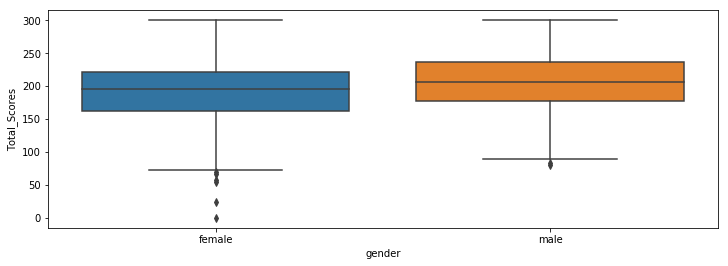

In [33]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(df["gender"], df["Total_Scores"])

The violin plot gives a bit more inisghts into the shapes of the distribution compared to the traditional box plot

The violinplot below is based on the same data as the boxplot above. 

We can see quite clearly that the distribution for female has a  longer shoulder suggesting that this distribution includes many people

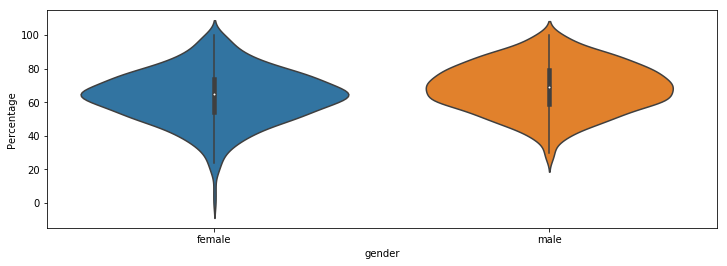

In [32]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(df["gender"], df["Percentage"])